* Every *year*, a *firm* publishes a descriptive *text*
* A *firm* belongs to one or more *categories*
* A *firm* can slightly change its *categories* over the *years*
* Each *category* fits into a unique *supercategory*
* A *supercategory* regroups at most ten *categories*, usually around 5 or 7.
* We have some *labelled data* : a mapping from some descriptive *texts* to a list of *categories* (and consequentially of *supercategories*)
* For each *category* we have a list of *characteristic words*.
* For each *supercategory*, we have a list of *characteristic words* to which we add the lists of *characteristic words* of the *categories* that belongs to it [the *supercategory*].
* We need to find a *strategy* : a generic way to map a descriptive *text* to the list of *categories* the *firm* the *text* describes belongs to.
* To get a feeling of how well a *strategy* works, we use it on the *texts* for which we have *labelled data* and compare the results to what we know is true.
    * A *false positive* is a mistake where the *strategy* said that the *firm* belongs to a *category*, when in fact, it does not.
    * A *false negative* is a mistake where the *strategy* omits to say that the *firm* belongs to a *category*, when in fact it does.
    * To test a *strategy* we ask it to map each *text* in the *labelled data* set with the *(super)categories*. We count the number of *false positives* and *false negatives* and plot a dot in a graph where the abcissa is the # of FP and the ordinates is the # of FN.

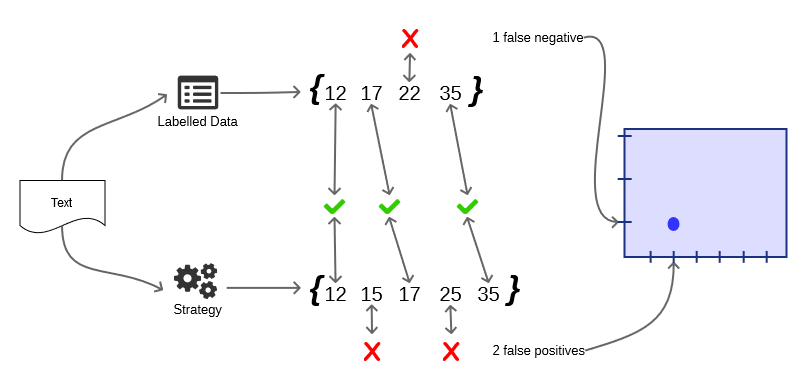

In [1]:
from IPython.display import Image
Image(filename='FPFN.png') 

* We use three *baseline strategies* to compare our proposed *strategies* to :
    * The *best baseline* simply does a lookup in the *labelled data* and gives the actual list of *categories* for the *text*. It never makes a mistake, neither *false positive* nor *false negative*.
    * The *worst baseline* answers everything wrong : it will give all the *categories* the *firm* does not belong to, and none of the *categories* it belongs to. Therefore, it makes the highest possible number of *false positives* (i.e. #of total categories - #of categories for this firm) and the highest possible number of *false negatives* (i.e. #of categories for this firm).
    * The *random baseline* tosses a coin for each *category*. If the coin fall on heads, it will say that the firm belongs to the category, otherwise it will say it does not.
* We study some strategies of our own :
    * We use *supervised learning* techniques to train some *classifiers* :
        * We train one *classifier* per *category* and *supercategory*, in the *one-vs-all* approach.
        * The *training set* is made up on one side of all $N$ *texts* from the *labelled data* that we know belong to a given *category*, on the other side of $N$ randomly chosen texts, taken from the *labelled data* as well, that we know do not belong to the given *category*
        * We train the classifier and evaluate its performance thanks to a *leave-one-out*.
        * We now have a classifier that can recognize a given *category* or *supercategory*
        * We repeat those steps for every *category* or *supercategory* for which we have enough *labelled data*
        * We give a *text* to all classifiers, and associate to this *text* any *(super)category* for which the corresponding *classifier* recognized the *text*.
    * We use the *characteristic words* to do the mapping. We first use some basic strategies :
        * The *all-must-match* strategy says a *text* falls into a *category* or *supercategory* if all the *characteristic words* can be found in the text
        * The *any-match* strategy says a *text* falls into a *category* or *supercategory* if any of the *characteristic words* can be found in the text
        * The *$n$-most-matching* strategy sorts the *categories* or *supercategories* by the proportion of their *characteristic words* that can be found in the *text*, and returns the $n$ *(super)categories* with the highest propotion
        * The *any-match-within-rank-$k$* strategy ranks the words in the *text* by their frequency (ignoring very common stop words likte 'the', 'at', 'of' etc.). A *(super)category* is returned if one of its *characteristic words* can be found in the $k$ most frequent words of the *text*
    * We use the *tf-idf* transform on the *characteristic words*
        * We consider each set of *characteristic words* as a document
        * Each *category* or *supercategory* now can be represented as a numeric vector with high values corresponding to truly characteristic words (and smaller values for words that are common to multiple *categories*).
        * We transform the *text* using the same *tf-idf* transform.
        * We find the closest *(super)category vector(s)* (w.r.t. the euclidian distance) : those are the *(super)categories* the *strategy* thinks the *firm* belongs to.
* We proceed hierarchycally : First we match a *text* with its *supercategory(ies)*, then, assuming we know the *supercategory(ies)* we try to find which *category(ies)* within that *supercategory* the *firm* belongs to.
    